# Краткий анализ оттока клиентов

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


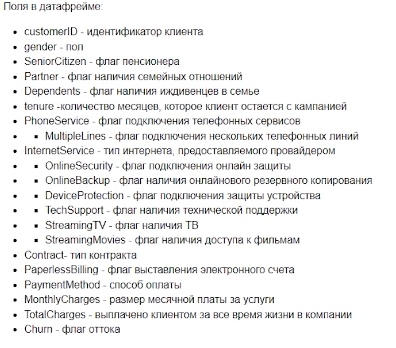

## Задание 1

- Найдем переменные, которые разделяют факт ухода клиента. 
- Посмотрим, влияет ли флаг пенсионера на вероятность оттока.
- Построим диаграмму, которая могла бы ответить на этот вопрос.

In [8]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])
contingency_table

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


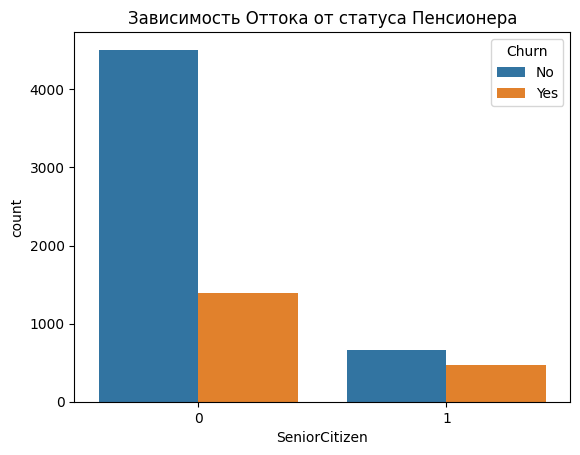

In [11]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

plt.title('Зависимость Оттока от статуса Пенсионера')
plt.show()

In [12]:
fig = px.histogram(
    data_frame=df,
    x="SeniorCitizen",
    color="Churn",
    title="Кол-во <b>ушедших</b> и <b>неушедших</b> клиентов в зависимости от флага пенсионера",
    histnorm="density",
)

fig.update_xaxes(categoryorder="total descending")

fig.show()

In [13]:
pensioners = df[df['SeniorCitizen'] == 0]
pensioners_churn_rate = (pensioners[pensioners['Churn'] == 'Yes'].shape[0] / pensioners.shape[0]) * 100

# Округляем до целого числа
pensioners_churn_rate_rounded = round(pensioners_churn_rate)
pensioners_churn_rate_rounded

24

## Задание 2

Если у клиента подключен интернет, то ему доступны 6 дополнительных услуг, а именно: 
- онлайн защита, 
- онлайновое резервное копирование, 
- защита устройства, 
- наличие ТВ, 
- наличие доступа к фильмам. 

Скорее всего, чтобы удержать клиента нам выгодно по-максимуму погружать его в нашу экосистему. 
- Посмотрим, зависит ли % клиентов находящихся в оттоке от кол-ва услуг, которые у них были подключены (по клиентам, у кого подключен интернет)? 
- Одинаковая ли зависимость на разных типах интернета? 
- Построим график, который смог бы ответить на эти вопросы.

In [14]:
pensioners = df[df['SeniorCitizen'] == 0]
pensioners_churn_rate = (pensioners[pensioners['Churn'] == 'Yes'].shape[0] / pensioners.shape[0]) * 100

# Округляем до целого числа
pensioners_churn_rate_rounded = round(pensioners_churn_rate)
pensioners_churn_rate_rounded

24

In [19]:
df_binary = df[['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Добавляем новую колонку с количеством подключенных услуг
df['Count_InternetService'] = df_binary.sum(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   PhoneService           7043 non-null   object 
 7   MultipleLines          7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_4348\3269929232.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



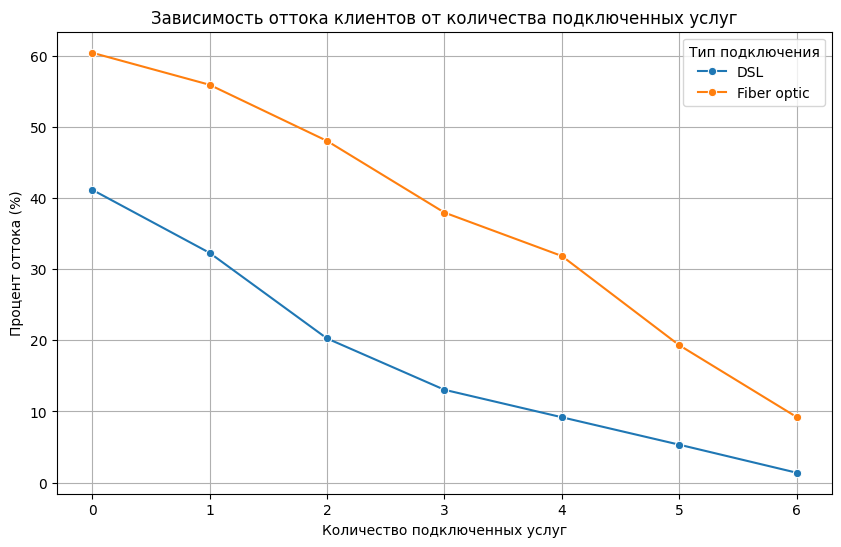

In [20]:
# Фильтруем данные по интернет-подключению
df_internet = df[df['InternetService'].isin(['Fiber optic', 'DSL'])]

# Считаем процент оттока в зависимости от количества услуг и типа подключения
churn_data = df_internet.groupby(['Count_InternetService', 'InternetService'])['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_data, x='Count_InternetService', y='Churn', hue='InternetService', marker='o')

plt.title('Зависимость оттока клиентов от количества подключенных услуг')
plt.xlabel('Количество подключенных услуг')
plt.ylabel('Процент оттока (%)')
plt.legend(title='Тип подключения')
plt.grid(True)
plt.show()

In [25]:
# делаем таблицу, где каждому типу интернета на каждое кол-во подключенных доп. услуг будет соотв-ть % ушедших клиентов
# и заодно посмотрим, а какое кол-во наблюдений имеем в каждой группе, можно ли вообще эти цифры сравнивать

df['Churn_flg']=df['Churn'].map({'No': 0, 'Yes': 1})
table = df.groupby(['InternetService','Count_InternetService']).agg({'customerID':'nunique','Churn_flg':'mean'}).reset_index()
table

,InternetService,Count_InternetService,customerID,Churn_flg
0,DSL,0,294,0.411565
1,DSL,1,415,0.322892
2,DSL,2,454,0.202643
3,DSL,3,475,0.130526
4,DSL,4,359,0.091922
5,DSL,5,281,0.053381
6,DSL,6,143,0.013986
7,Fiber optic,0,399,0.604010
8,Fiber optic,1,551,0.558984
9,Fiber optic,2,579,0.480138


In [27]:
fig = go.Figure()

#  каждую из линий добавляем отдельно на график
fig.add_trace(go.Scatter(x=table.query('InternetService=="DSL"')['Count_InternetService'],
                         y=table.query('InternetService=="DSL"')['Churn_flg'],
                    mode='lines',
                    name='DSL'))

fig.add_trace(go.Scatter(x=table.query('InternetService=="Fiber optic"')['Count_InternetService'], 
                         y=table.query('InternetService=="Fiber optic"')['Churn_flg'],
                    mode='lines',
                    name='Fiber optic'))
fig.update_layout(
    width=800, # задаем размер графика
    height=600,
    title='Зависимость % ушедших клиентов от кол-ва подключенных доп услуг',
    xaxis_title='число подкл услуг',
    yaxis_title='% ушедших клиентов'
)
fig.show()

In [21]:
df_filtered = df[df['Count_InternetService'] == 4]

# Считаем долю оттока для Fiber optic
fiber_optic = df_filtered[df_filtered['InternetService'] == 'Fiber optic']
fiber_optic_churn_rate = (fiber_optic[fiber_optic['Churn'] == 'Yes'].shape[0] / fiber_optic.shape[0]) * 100

# Считаем долю оттока для DSL
dsl = df_filtered[df_filtered['InternetService'] == 'DSL']
dsl_churn_rate = (dsl[dsl['Churn'] == 'Yes'].shape[0] / dsl.shape[0]) * 100

# Вычисляем разницу
churn_difference = abs(fiber_optic_churn_rate - dsl_churn_rate)

# Округляем до целого числа
churn_difference_rounded = round(churn_difference)
churn_difference_rounded

23

### **Выводы**

Чем больше опций было подключено к тарифу интернета, тем лояльнее клиент и меньше вероятность, что клиент уйдет. Однако тут есть еще 2 интересных наблюдения:
- у обоих кривых одинаковый наклон до 4 подкл. услуг, далее у клиентов с fiber optic резкое падение оттока при увеличении числа услуг. Интересно, с чем это связано и можно ли как-то эту информацию использовать для того, чтобы удерживать больше клиентов?
- кривая по клиентам с fiber optic всегда выше DSL: что-то с этим типом интернета не так, нужно разбираться, почему люди так активно от него отказываются?